# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

/var/folders/1t/fytvdxqn1zl59hgvp11z64700000gn/T/ipykernel_2468/3997190965.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
print(df.shape)
print(df.columns)
df.head()


(1715, 25)
Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

print(df.columns)
df.head()



Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [4]:
print(df["YEAR"].unique())
print(df["YEAR"].nunique())

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]
33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:
states = df.groupby("STATE")
states["AVG_MATH_4_SCORE"].mean()

STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

Find the average for your chosen test across all states in 2019

In [6]:
year = df.groupby("YEAR")
print(df.shape)
year["AVG_MATH_4_SCORE"].mean()


(1715, 25)


YEAR
1986           NaN
1987           NaN
1988           NaN
1989           NaN
1990    213.000000
1991           NaN
1992    218.418605
1993           NaN
1994           NaN
1995           NaN
1996    224.000000
1997           NaN
1998           NaN
1999           NaN
2000    223.976744
2001           NaN
2002           NaN
2003    234.000000
2004           NaN
2005    237.169811
2006           NaN
2007    239.207547
2008           NaN
2009    239.547170
2010           NaN
2011    240.490566
2012           NaN
2013    241.962264
2014           NaN
2015    240.415094
2016           NaN
2017    239.433962
2019    239.943396
Name: AVG_MATH_4_SCORE, dtype: float64

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
print(df.shape)
states["AVG_MATH_4_SCORE"].max()

(1715, 25)


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.dropna(subset=['INSTRUCTION_EXPENDITURE'], inplace=True)
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

print(df.shape)
df.head()

(440, 26)


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,2.025197
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2.132082
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,2.184247
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,2.732512
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,2.680986


Feature engineering justification: I wanted to use data only relevant to the Avg Grade 4 Math Score and compare it with the expenditure data. Specifically to compare instruction expenditure per student in comparison with the test scores

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, '4th Grade Math Score Over Time')

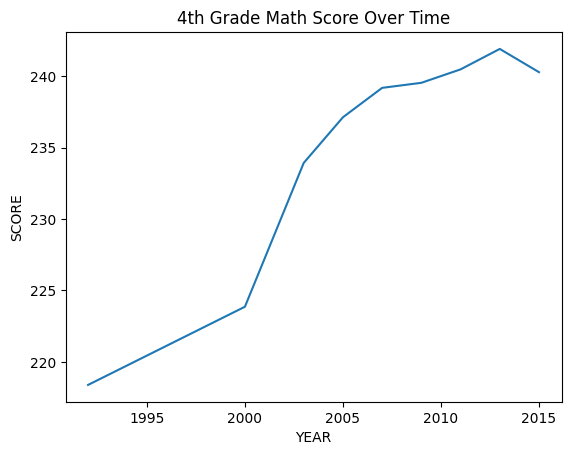

In [9]:
df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Math Score Over Time')

The 4th Grade mean math score across all states in each year sees a positive correlation. From prior to 1995 to post 2000 growth of Math Grades is less steep. From 2000 to 2015  growth is increasing at a decreasing rate.

**Visualization 2**

Text(0.5, 1.0, 'Expenditure Data National Wide Average')

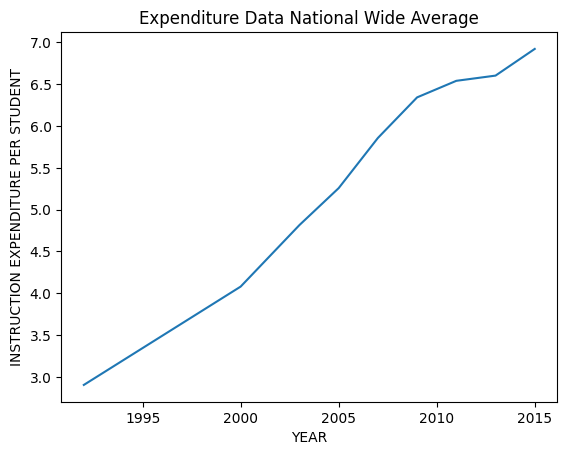

In [10]:
df.groupby('YEAR')["INSTRUCTION_EXPENDITURE_PER_STUDENT"].mean().plot()
plt.ylabel('INSTRUCTION EXPENDITURE PER STUDENT')
plt.title('Expenditure Data National Wide Average')

There is a clear positive growth in expenditure on instruction per studetn throughout the data set

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['AVG_MATH_4_SCORE',"INSTRUCTION_EXPENDITURE_PER_STUDENT","INSTRUCTION_EXPENDITURE"]].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [22]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [23]:
# create your model here
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [26]:
print("R^2 value: ") 
print(model.score(X_test, y_test))
print("Mean Error: ") 
print(np.mean(model.predict(X_test)-y_test))
print("Abs Mean Error: ") 
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print("Root Mean Sqrd Error: ") 
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

R^2 value: 
1.0
Mean Error: 
1.1933888221061682e-11
Abs Mean Error: 
9.249780739330824e-11
Root Mean Sqrd Error: 
1.3936950171384546e-10


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

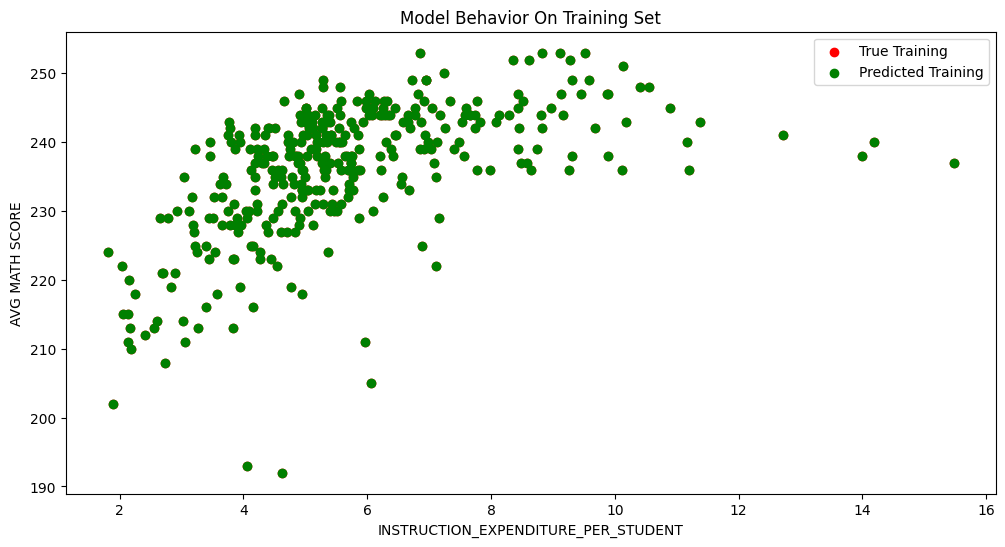

In [27]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG MATH SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

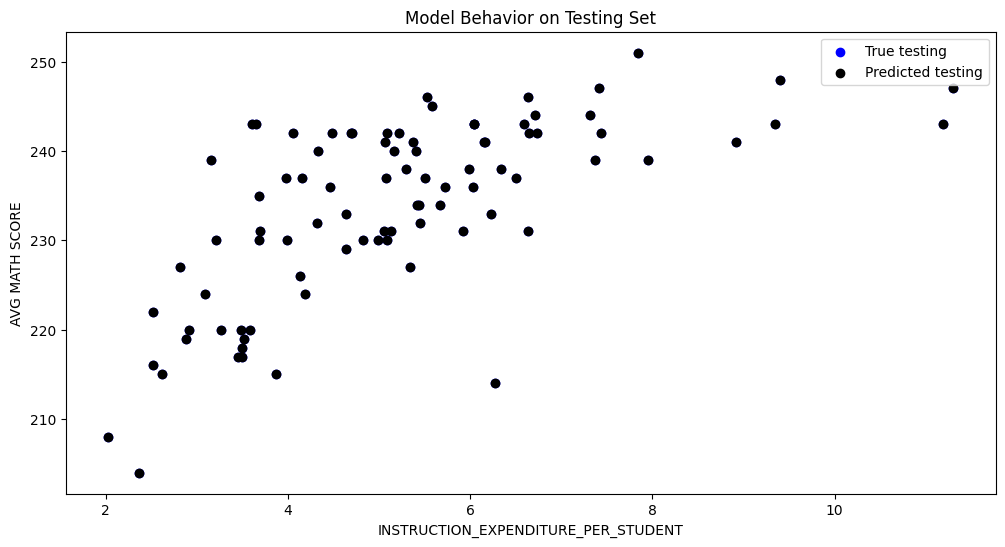

In [29]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG MATH SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

The data that I decided to use was Insutrction Expenditure, and Grade 4 Math Score. Specifically I wanted to see if there was a connection between Instruction Expenditure / Capita in connection to the Grade 4 Math Score.

What the data seems to show is that generally there is a positive trend between expenditure/student to Average grade 4 math. However, this finding is not extremely conclusive as looking from the scatter plot the data could potentially fit other regressions better.

Finally, on the performance of the model, although the error values found were extremely small in the order of -10/-11 I believe this shouldn't be the case/could be an error in my implementation of the regression analysis. 
